In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

#creating a path for the csv file
Cleaned_School_Data_Path = "/Users/cindyreynoso/Documents/Homework/Project-1/Data/CleanedSchoolData.csv"

#read the csv file
Cleaned_School_Data = pd.read_csv(Cleaned_School_Data_Path)

#display the data frame
Cleaned_School_Data


,Gender,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Average Score
0,female,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,72.0
1,female,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,69,90,88,82.0
2,female,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,90.0
3,male,associate's degree,free/reduced,none,married,never,no,1.0,school_bus,5 - 10,45,56,42,48.0
4,male,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,female,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65,62.0
29447,male,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51,54.0
29448,female,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67,66.0
29449,female,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93,88.0


In [11]:
#selecting the columns from data frame
StudyHrs_AverageScores_df= Cleaned_School_Data.loc[0:, ['WklyStudyHours', 'Average Score']]

StudyHrs_AverageScores_df

,WklyStudyHours,Average Score
0,< 5,72.0
1,5 - 10,82.0
2,< 5,90.0
3,5 - 10,48.0
4,5 - 10,76.0
...,...,...
29446,5 - 10,62.0
29447,5 - 10,54.0
29448,5 - 10,66.0
29449,5 - 10,88.0


In [12]:
StudyHourGroup = StudyHrs_AverageScores_df.groupby('WklyStudyHours')["Average Score"].mean()
StudyHourGroup = pd.DataFrame(StudyHourGroup)


In [18]:
StudyHourGroup = StudyHourGroup.reindex(index=["< 5","5 - 10","> 10"])

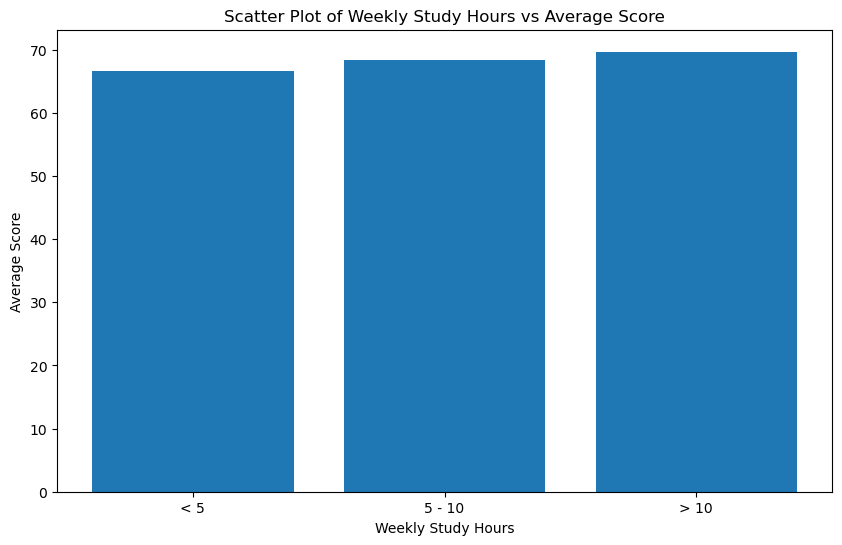

In [19]:
# Scatter Plot
plt.figure(figsize=(10, 6))
plt.bar(StudyHourGroup.index , StudyHourGroup ['Average Score'])
plt.title('Scatter Plot of Weekly Study Hours vs Average Score')
plt.xlabel('Weekly Study Hours')
plt.ylabel('Average Score')
plt.grid(False)
plt.show()

Trend of students with the highest average score

In [25]:
HighStudyHr = Cleaned_School_Data.loc[Cleaned_School_Data['WklyStudyHours']== "> 10"]

In [26]:
HighStudyHr

,Gender,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Average Score
7,male,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39,41.0
8,male,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68,66.0
12,male,some college,standard,completed,single,sometimes,yes,1.0,private,> 10,80,73,71,75.0
26,female,bachelor's degree,standard,none,married,sometimes,yes,4.0,school_bus,> 10,69,70,76,72.0
45,male,some college,standard,none,married,never,no,3.0,school_bus,> 10,54,55,48,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29401,male,associate's degree,free/reduced,none,married,never,no,1.0,school_bus,> 10,68,59,58,62.0
29414,female,bachelor's degree,standard,none,single,never,no,1.0,school_bus,> 10,59,65,65,63.0
29420,female,some college,standard,none,married,sometimes,no,2.0,private,> 10,73,72,75,73.0
29421,female,some high school,standard,none,married,never,no,2.0,private,> 10,66,79,71,72.0


In [35]:
SportCount = HighStudyHr.groupby("PracticeSport")["PracticeSport"].count()

In [39]:

SportCount = pd.DataFrame(SportCount)

SportCount


,PracticeSport
PracticeSport,
never,760
regularly,1783
sometimes,2460


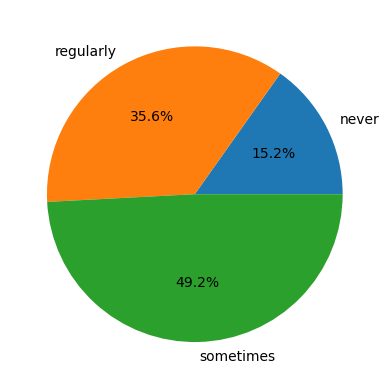

In [49]:
plt.pie(SportCount["PracticeSport"], labels= SportCount.index, autopct= '%1.1f%%');